<a href="https://colab.research.google.com/github/kezinas/ml2025/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Логистическая регрессия#

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


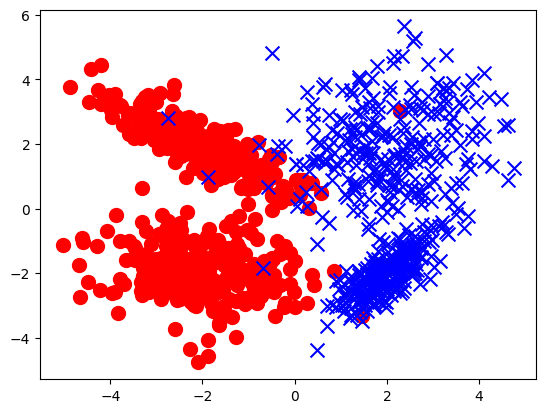

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

class_sep влияет на то, насколько сильно разделены классы

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X, y)

LogisticRegression()

In [ ]:
y_pred_lr = model.predict(X)

In [ ]:
model.score(X, y)

0.976

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred_lr)
f1 = f1_score(y, y_pred_lr)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.01),
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01))

In [ ]:
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

In [ ]:
Z = model.predict_proba(XX)[:, 0].reshape(xx.shape) #значение функции гипотезы

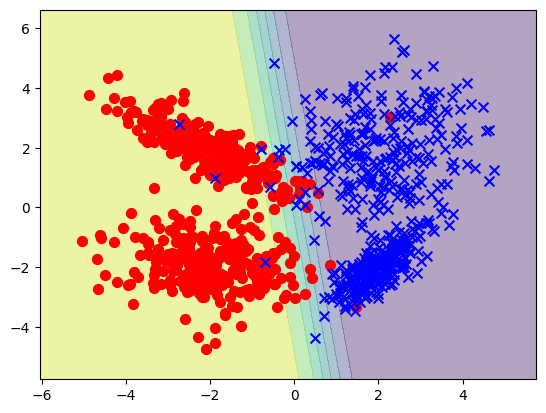

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=50)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=50)

In [ ]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    def fit(self, X, y):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

In [ ]:
class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    def predict_proba(self, X):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        return self.sigmoid(X, self.b)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [ ]:
logreg = LogReg()
#X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [ ]:
y_pred_proba = logreg.predict_proba(X)

In [ ]:
X.shape

(1000, 3)

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.01),
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

In [ ]:
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

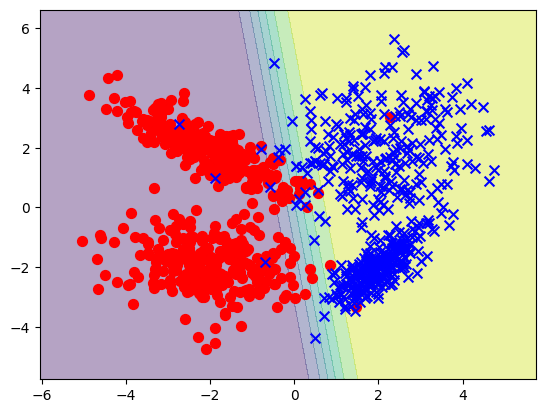

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=50)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=50)

In [ ]:
from sklearn.datasets import make_classification
X1,y1 = make_classification (n_samples=1000,
                          n_features=5,
                          n_informative=5,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

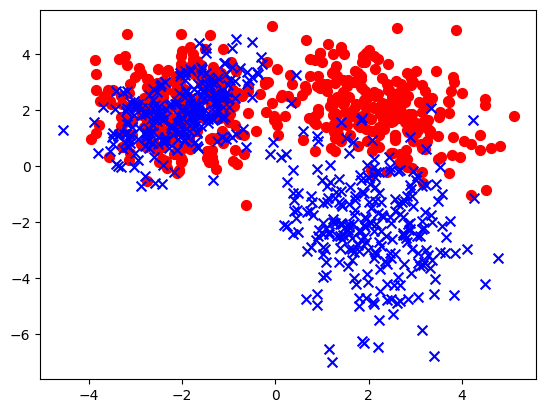

In [ ]:
plt.scatter(X1[:, 0][y1==0], X1[:, 1][y1==0], marker="o", c='r', s=50)
plt.scatter(X1[:, 0][y1==1], X1[:, 1][y1==1], marker="x", c='b', s=50)

In [ ]:
logreg1 = LogReg()
logreg1.fit(X1, y1)
y_pred1 = logreg1.predict(X1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y1, y_pred1)
f1 = f1_score(y1, y_pred1)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.92 F1-score = 0.91


In [ ]:
from sklearn.datasets import make_classification
X2,y2 = make_classification (n_samples=1000,
                          n_features=5,
                          n_informative=5,
                          n_redundant=0,
                          n_classes=5,
                          class_sep=2,
                          random_state=1)

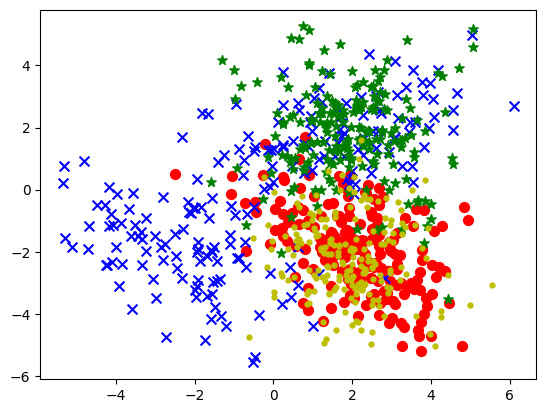

In [ ]:
plt.scatter(X2[:, 0][y2==0], X2[:, 1][y2==0], marker="o", c='r', s=50)
plt.scatter(X2[:, 0][y2==1], X2[:, 1][y2==1], marker="x", c='b', s=50)
plt.scatter(X2[:, 0][y2==2], X2[:, 1][y2==2], marker="*", c='g', s=50)
plt.scatter(X2[:, 0][y2==3], X2[:, 1][y2==3], marker=".", c='y', s=50)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
base_clf = LogisticRegression(max_iter=1000, random_state=42)
ovr_clf = OneVsRestClassifier(base_clf)

# Обучение модели на всех данных
ovr_clf.fit(X2, y2)

# 3. Предсказание на тех же данных (без разделения)
y_pred2 = ovr_clf.predict(X2)

from sklearn.metrics import accuracy_score, f1_score
print(f"""
Multi-class classification results:
Accuracy: {accuracy_score(y2, y_pred2):.1%}
F1-score (macro): {f1_score(y2, y_pred2, average='macro'):.1%}
""")


Multi-class classification results:
Accuracy: 79.0%
F1-score (macro): 78.9%



In [ ]:
ovr_clf.predict_proba(X2)

array([[8.01737756e-01, 1.07317520e-02, 4.77153999e-04, 1.43454106e-01,
        4.35992326e-02],
       [2.56244432e-01, 5.42938040e-01, 5.36658937e-03, 1.74640667e-03,
        1.93704531e-01],
       [8.27698275e-01, 9.79714741e-02, 1.23615887e-02, 6.01422465e-02,
        1.82641558e-03],
       ...,
       [4.53812458e-03, 1.01296141e-02, 9.45747792e-01, 6.24195916e-03,
        3.33425105e-02],
       [1.90890560e-03, 3.20013589e-01, 1.47065790e-02, 4.93481200e-02,
        6.14022806e-01],
       [1.06959977e-06, 3.47932866e-02, 3.54890650e-01, 1.00918310e-02,
        6.00223163e-01]])

#Классификация на реальных данных

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

In [ ]:
y.shape, X.shape

((768,), (768, 8))

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X, y)

LogisticRegression(max_iter=1000)

In [ ]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.22481312e-01  3.51085717e-02 -1.33007000e-02  7.81917450e-04
 -1.17386223e-03  8.96453133e-02  8.68084149e-01  1.49863097e-02]


In [ ]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.12248131230767899
Glucose 0.035108571700951885
BloodPressure -0.013300699957495027
SkinThickness 0.0007819174504031511
Insulin -0.0011738622306456958
BMI 0.08964531325192308
DiabetesPedigreeFunction 0.868084149265314
Age 0.014986309693622945


In [ ]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-8.36470855]


In [ ]:
y_pred = logistic.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[444,  56],
       [112, 156]])

<Axes: >

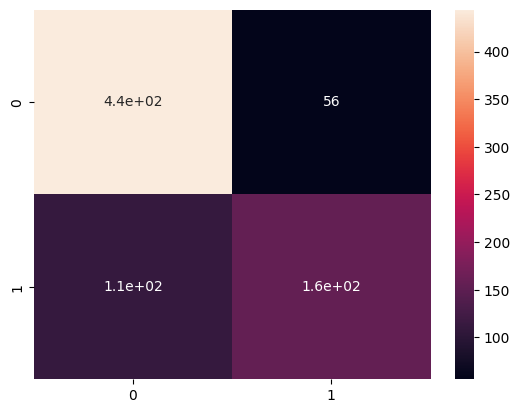

In [ ]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [ ]:
logistic.score(X, y)

0.78125

In [ ]:
metrics.accuracy_score(y, y_pred)

0.78125

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
polynomial = LogisticRegression(max_iter=10000)
polynomial.fit(X_poly, y)
y_pred_poly = polynomial.predict(X_poly)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
polynomial.score(X_poly, y)

0.79296875

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def train_and_evaluate_classifiers(X, y, random_state=42):
    # Модели, ТРЕБУЮЩИЕ масштабирования
    scale_models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=random_state),
        'SVC (linear)': SVC(kernel='linear', C=1.0, random_state=random_state),
        'SVC (rbf)': SVC(kernel='rbf', C=1.0, gamma='scale', random_state=random_state),
        'SVC (poly)': SVC(kernel='poly', degree=2, C=1.0, random_state=random_state),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'MLP': MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=random_state)
    }

    # Модели, НЕ требующие масштабирования
    no_scale_models = {
        'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=random_state),
        'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=5, random_state=random_state, n_jobs=-1),
        'Bagging': BaggingClassifier(n_estimators=50, random_state=random_state, n_jobs=-1)
    }

    # Масштабируем данные один раз
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    results = {}

    # Обучение моделей с масштабированием
    for name, model in scale_models.items():
        model.fit(X_scaled, y)
        y_pred = model.predict(X_scaled)
        results[name] = {
            'Accuracy': accuracy_score(y, y_pred),
            'Confusion Matrix': confusion_matrix(y, y_pred)
        }

    # Обучение моделей без масштабирования
    for name, model in no_scale_models.items():
        model.fit(X, y)
        y_pred = model.predict(X)
        results[name] = {
            'Accuracy': accuracy_score(y, y_pred),
            'Confusion Matrix': confusion_matrix(y, y_pred)
        }

    # Вывод результатов
    print("{:<25} {:<10}".format('Model', 'Accuracy'))
    print("-" * 35)
    for name, metrics in results.items():
        print("{:<25} {:<10.3f}".format(name, metrics['Accuracy']))
        print("Confusion Matrix:")
        print(metrics['Confusion Matrix'])
        print("-" * 35)

    return results

In [ ]:
res = train_and_evaluate_classifiers(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model                     Accuracy  
-----------------------------------
Logistic Regression       0.784     
Confusion Matrix:
[[446  54]
 [112 156]]
-----------------------------------
SVC (linear)              0.773     
Confusion Matrix:
[[442  58]
 [116 152]]
-----------------------------------
SVC (rbf)                 0.824     
Confusion Matrix:
[[463  37]
 [ 98 170]]
-----------------------------------
SVC (poly)                0.717     
Confusion Matrix:
[[475  25]
 [192  76]]
-----------------------------------
KNN                       0.832     
Confusion Matrix:
[[451  49]
 [ 80 188]]
-----------------------------------
MLP                       0.841     
Confusion Matrix:
[[455  45]
 [ 77 191]]
-----------------------------------
Decision Tree             0.837     
Confusion Matrix:
[[452  48]
 [ 77 191]]
-----------------------------------
Random Forest             0.846     
Confusion Matrix:
[[471  29]
 [ 89 179]]
-----------------------------------
Bagging        

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data1 = pd.DataFrame(iris.data, columns = iris.feature_names)
data1["Type"] = iris.target

In [ ]:
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Type               150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
data1.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


In [ ]:
y1 = data1['Type']
X1 = data1.drop('Type', axis=1)
y1.shape, X1.shape

((150,), (150, 4))

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic1 = LogisticRegression(max_iter=1000)
logistic1.fit(X1, y1)

LogisticRegression(max_iter=1000)

In [ ]:
_ = [print(k, v) for k, v in zip(X1.columns, logistic1.coef_[0])]

sepal length (cm) -0.42456598842517423
sepal width (cm) 0.9666426068725607
petal length (cm) -2.515546250584303
petal width (cm) -1.0821692743519593


In [ ]:
y_pred1 = logistic1.predict(X1)
_ = [print(a, b) for a, b in list(zip(y1, y_pred1))[70:100]]

1 2
1 1
1 1
1 1
1 1
1 1
1 1
1 2
1 1
1 1
1 1
1 1
1 1
1 2
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y1, y_pred1)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

<Axes: >

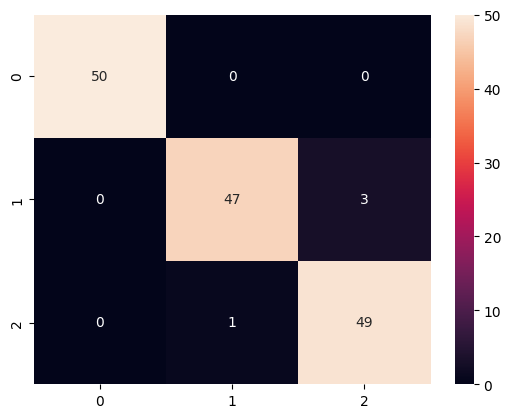

In [ ]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y1, y_pred1), annot=True)

In [ ]:
logistic1.score(X1, y1)

0.9733333333333334

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly1 = PolynomialFeatures(2)
X_poly1 = poly1.fit_transform(X1)
polynomial1 = LogisticRegression(max_iter=10000)
polynomial1.fit(X_poly1, y1)
y_pred_poly1 = polynomial1.predict(X_poly1)

In [ ]:
polynomial1.score(X_poly1, y1)

0.98

In [ ]:
res1 = train_and_evaluate_classifiers(X1, y1)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model                     Accuracy  
-----------------------------------
Logistic Regression       0.973     
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
-----------------------------------
SVC (linear)              0.967     
Confusion Matrix:
[[50  0  0]
 [ 0 46  4]
 [ 0  1 49]]
-----------------------------------
SVC (rbf)                 0.973     
Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]
-----------------------------------
SVC (poly)                0.880     
Confusion Matrix:
[[46  0  4]
 [ 0 49  1]
 [ 9  4 37]]
-----------------------------------
KNN                       0.953     
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]
-----------------------------------
MLP                       0.973     
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
-----------------------------------
Decision Tree             1.000     
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
-----------------------------------
Random Forest             1.000